In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

from li.diagnostic import trap_freq
from li.diagnostic import U_dip
from li.diagnostic import breit_rabi
from li.visualize import breit_rabi_visualize

from scipy.optimize import curve_fit

In [2]:
trap = trap_freq(780, 10e-3, 50e-6)
u1 = U_dip(780, 10e-3, 50e-6, False) / const.k
u2 = U_dip(780, 10e-3, 50e-6, True, 136)
print(trap)
print(u1)
print(u2)


136.3785226168286
3.3200285037809446e-07
330.16244055258835


In [3]:
# todo

# Scattering length
# ln(k_f a_2D)
    # Scattering length in 2D, 3D

In [4]:
# DP = np.array([0.00065, 0.0013, 0.002, 0.0026, 0.0052, 0.0026])
# w = np.array([0.01, 0.00674, 0.005, 0.00371, 0.00342, 0.00356])

DP = np.array([0.00065, 0.0013, 0.002, 0.0026])
w = np.array([0.01, 0.00674, 0.005, 0.00355])

trap_f = 1/2 * 1/w
U = U_dip(780, 10e-3, 50e-6, True, trap_f)

U

array([ 44.62619493,  98.23586306, 178.50477971, 354.10589111])

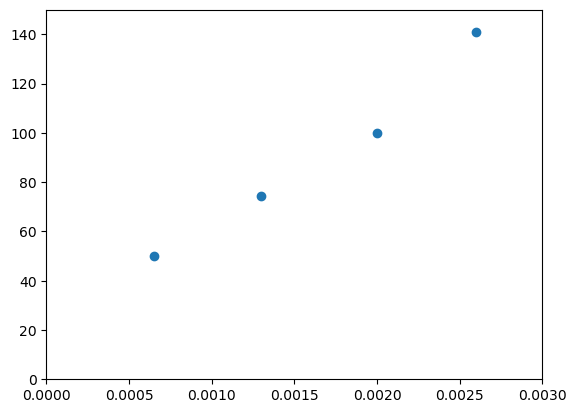

In [5]:
plt.scatter(DP, trap_f)
plt.xlim(0,0.003)
plt.ylim(0,150)

plt.show()

In [6]:
trap_f

array([ 50.        ,  74.18397626, 100.        , 140.84507042])

In [7]:
def funccc(x, a, b, c):
    return a * x**b + c

In [8]:
popt, pcov = curve_fit(funccc, DP, trap_f, p0 = [3000, 0.5, 0], bounds = ([3000, 0.4, -100], [6000, 0.5, 0]))

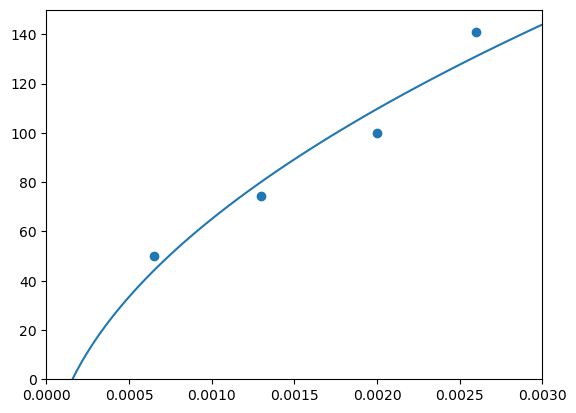

In [9]:
plt.scatter(DP, trap_f)

plt.plot(np.linspace(0, 0.003, 100), funccc(np.linspace(0, 0.003, 100), popt[0], popt[1], popt[2]))
# plt.plot(np.linspace(0, 0.003, 100), funccc(np.linspace(0, 0.003, 100), 3000, 0.5, 0))

plt.xlim(0,0.003)
plt.ylim(0,150)

plt.show()

In [10]:
popt

array([ 3.41011971e+03,  5.00000000e-01, -4.28134405e+01])

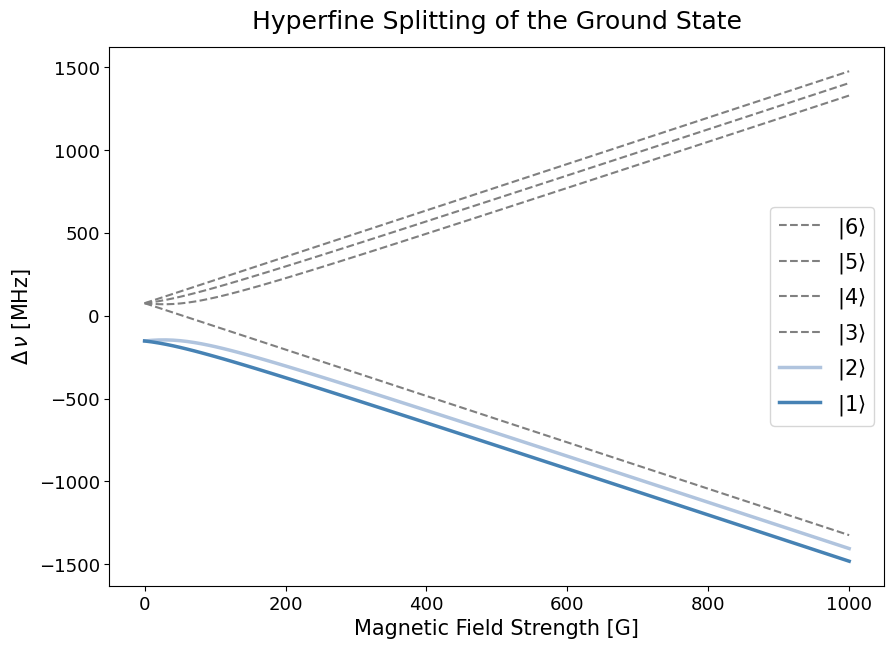

In [13]:
breit_rabi_visualize(np.linspace(0, 1000, 100), [1, 2])